# Data Preprocessing

In [131]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #for confirguation of the plot

In [17]:
pwd

'C:\\Users\\siris'

In [124]:
#read data 2019
df_2019_jan = pd.read_csv("C:/Users/siris/Downloads/Jan_2019_ontime.csv")

df_2019 = pd.read_csv("C:/Users/siris/Downloads/Jan_2019_ontime.csv")

df_2019_jan

df_2019

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [125]:
df_2020_jan = pd.read_csv("C:/Users/siris/Downloads/Jan_2020_ontime.csv")

df_2020_jan

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [126]:
# lets see the columns of both the datas

df_2019_jan.columns
df_2020_jan.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [127]:
#let's look at the null values

df_2019_jan.info()

pd.isnull(df_2019_jan).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [128]:
df_2020_jan.info()


pd.isnull(df_2020_jan).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [129]:
#let's look how much % of data is missing to check if its small or big variance - 2019
for col in df_2019_jan.columns:
    missing_values = np.mean(df_2019_jan[col].isnull()) * 100
    print('{} - {:.3}%'.format(col, missing_values))

DAY_OF_MONTH - 0.0%
DAY_OF_WEEK - 0.0%
OP_UNIQUE_CARRIER - 0.0%
OP_CARRIER_AIRLINE_ID - 0.0%
OP_CARRIER - 0.0%
TAIL_NUM - 0.435%
OP_CARRIER_FL_NUM - 0.0%
ORIGIN_AIRPORT_ID - 0.0%
ORIGIN_AIRPORT_SEQ_ID - 0.0%
ORIGIN - 0.0%
DEST_AIRPORT_ID - 0.0%
DEST_AIRPORT_SEQ_ID - 0.0%
DEST - 0.0%
DEP_TIME - 2.8%
DEP_DEL15 - 2.8%
DEP_TIME_BLK - 0.0%
ARR_TIME - 2.92%
ARR_DEL15 - 3.09%
CANCELLED - 0.0%
DIVERTED - 0.0%
DISTANCE - 0.0%
Unnamed: 21 - 1e+02%


In [130]:
#let's look how much % of data is missing to check if its small or big variance - 2020
for col in df_2020_jan.columns:
    missing_values = np.mean(df_2020_jan[col].isnull()) * 100
    print('{} - {:.3}%'.format(col, missing_values))

DAY_OF_MONTH - 0.0%
DAY_OF_WEEK - 0.0%
OP_UNIQUE_CARRIER - 0.0%
OP_CARRIER_AIRLINE_ID - 0.0%
OP_CARRIER - 0.0%
TAIL_NUM - 0.115%
OP_CARRIER_FL_NUM - 0.0%
ORIGIN_AIRPORT_ID - 0.0%
ORIGIN_AIRPORT_SEQ_ID - 0.0%
ORIGIN - 0.0%
DEST_AIRPORT_ID - 0.0%
DEST_AIRPORT_SEQ_ID - 0.0%
DEST - 0.0%
DEP_TIME - 1.1%
DEP_DEL15 - 1.1%
DEP_TIME_BLK - 0.0%
ARR_TIME - 1.16%
ARR_DEL15 - 1.33%
CANCELLED - 0.0%
DIVERTED - 0.0%
DISTANCE - 0.0%
Unnamed: 21 - 1e+02%


As we can see there is not a major percent of missing values, we can ignore them

# Exploratory Data Analysis

In [132]:
#EDA on 2019 data - 

df_2019_jan.describe()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


In [133]:
#let's drop unwanted columns

#df_dropped = df_2019.drop(["OP_UNIQUE_CARRIER", "OP_CARRIER"],axis = 1,inplace = True)

#df_dropped

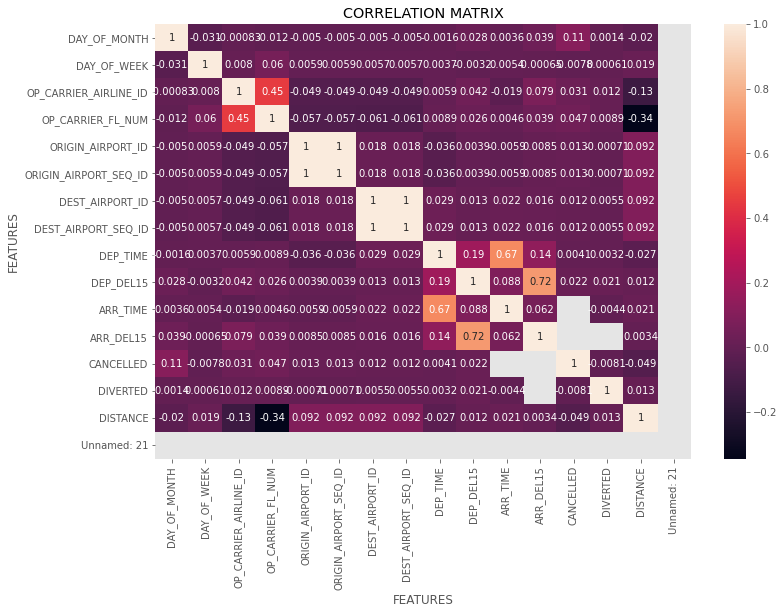

In [134]:
#let's find correlation

numerical_df = df_2019.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('CORRELATION MATRIX')
plt.xlabel('FEATURES')
plt.ylabel('FEATURES')
plt.show()

As we can see from above matrix, its not very clear.. let's look into individual columns by comparing..

# Flight delay by days - Arrival - 2019

Text(0.5, 1.0, 'Flight delay - Arrival')

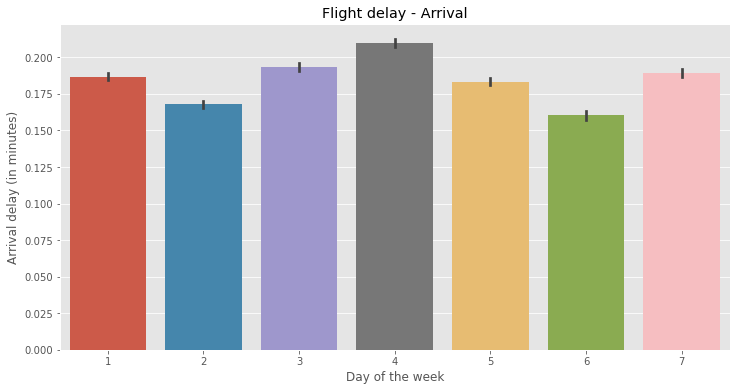

In [135]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_2019.DAY_OF_WEEK, y=df_2019['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")
plt.xlabel("Day of the week")
plt.title("Flight delay - Arrival")

As we can see, Thursdays(4) have the most delays in arrival(in minutes) followed by Wednesday and Sunday

# Flight delay by days -Arrival - 2020

Text(0.5, 1.0, 'Flight delay - Arrival')

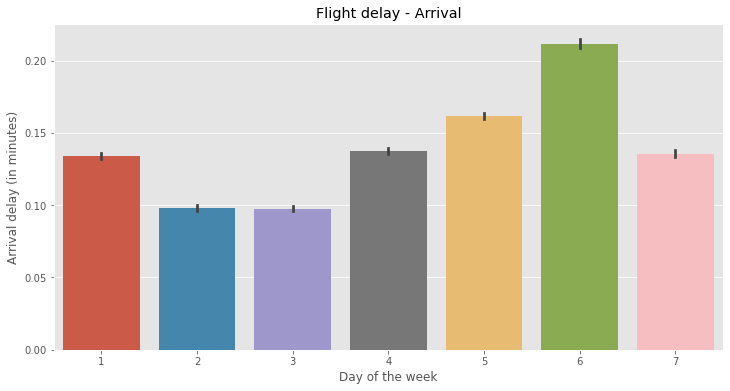

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_2020_jan.DAY_OF_WEEK, y=df_2020_jan['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")
plt.xlabel("Day of the week")
plt.title("Flight delay - Arrival")

And,in the next year 2020 we can see Saturdays(6) has the most delays

# Flight delay by days - Departure - 2019

Text(0, 0.5, 'Departure delay(in minutes)')

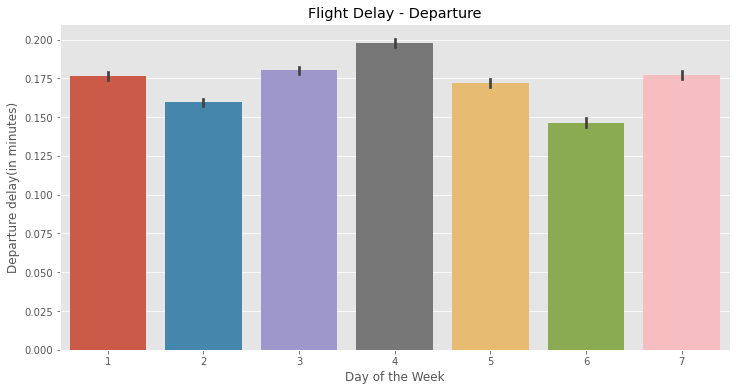

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_2019.DAY_OF_WEEK, y=df_2019.DEP_DEL15)
plt.title('Flight Delay - Departure')
plt.xlabel('Day of the Week')
plt.ylabel('Departure delay(in minutes)')

As we can see, Thursdays(4) have the most delays in departures(in minutes) as well followed by Tuesday and Friday

# Flight delays by days - Departure - 2020

Text(0, 0.5, 'Departure delay(in minutes)')

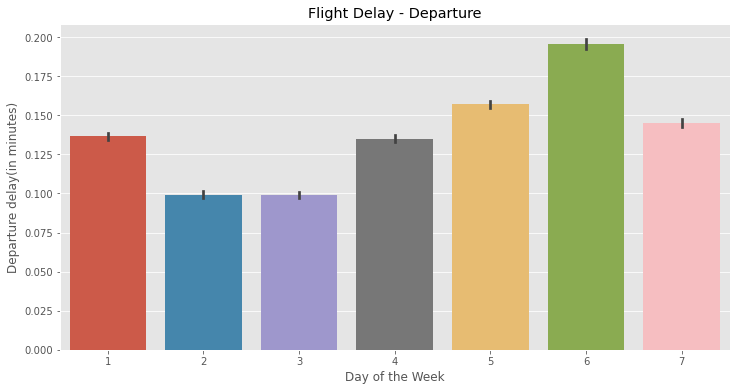

In [137]:
plt.figure(figsize=(12,6))
sns.barplot(x=df_2020_jan.DAY_OF_WEEK, y=df_2020_jan.DEP_DEL15)
plt.title('Flight Delay - Departure')
plt.xlabel('Day of the Week')
plt.ylabel('Departure delay(in minutes)')

When again compared to next year, we can see Saturdays(4) have most delays for departure

# Delays by time of the day - 2019

In [66]:
time = df_2019[['DEP_TIME_BLK','DEP_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values (by='DEP_DEL15', ascending=False)
time['Percentual']=time['DEP_DEL15']/ time['DEP_DEL15'].sum() * 100

time

,DEP_DEL15,Percentual
DEP_TIME_BLK,,
1700-1759,8194.0,8.282875
1800-1859,7929.0,8.015001
1900-1959,7615.0,7.697595
1600-1659,7380.0,7.460046
1400-1459,7324.0,7.403439
1500-1559,7286.0,7.365027
1200-1259,6542.0,6.612957
1300-1359,6444.0,6.513894
1100-1159,6030.0,6.095404


SO we can see here that most delays of the day are between 1700 - 1759 (5PM - 6PM), followed by 6PM - 7PM and 7PM - 8PM. So its between 5PM - 8PM.

# Delays by time of the day - 2020 

In [140]:
time = df_2020_jan[['DEP_TIME_BLK','DEP_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values (by='DEP_DEL15', ascending=False)
time['Percentual']=time['DEP_DEL15']/ time['DEP_DEL15'].sum() * 100

time

,DEP_DEL15,Percentual
DEP_TIME_BLK,,
1700-1759,6725.0,8.212838
1800-1859,6219.0,7.594890
1600-1659,5998.0,7.324996
1900-1959,5945.0,7.260271
1500-1559,5794.0,7.075863
1400-1459,5668.0,6.921987
1200-1259,5347.0,6.529969
1300-1359,5092.0,6.218553
2000-2059,5064.0,6.184358


So we can see here that most delays of the day are between 1700 - 1759 (5PM - 6PM), followed by 6PM - 7PM and 4PM - 5PM. So its between 4PM - 7PM.

# Airlines with most delays - 2019 & 2020

In [139]:
#lets check the total number of flights that flew in January 2019& 2020 in each airlines

flights_jan = pd.concat([df_2019_jan, df_2020_jan], ignore_index=True)

total_flights = flights_jan['OP_CARRIER'].value_counts()

total_flights

OP_CARRIER
WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: count, dtype: int64

CODES AND AIRLINE's NAMES ACCORDINGLY:

ZW	Air Wisconsin
AS	Alaska Airlines
G4 	Allegiant Air LLC 
AA	American Airlines
C5 	Champlain Air 
CP 	Compass Airlines 
DL	Delta Air Lines, Inc. 
EM 	Empire Airline 
9E 	Endeavor Air 
MQ 	Envoy Air 
EV	ExpressJet Airlines 
F9	Frontier Airlines, Inc. 
G7	GoJet Airlines 
HA 	Hawaiian Airlines Inc. 
QX	Horizon Air 
B6 	Jetblue Airways Corporation 
OH	Jetstream Intl 
YV 	Mesa Airlines, Inc. 
KS	Penair 
PT	Piedmont Airlines 
YX 	Republic Airlines 
OO 	Skywest Airlines 
WN 	Southwest Airlines 
NK 	Spirit Airlines, Inc. 
AX	Trans State 
UA	United Airlines, Inc. 

In [120]:
#Now let's look at % of delayed flights in each airline - 

Delayed_flights = df_jan[df_jan['ARR_DEL15'] > 0]['OP_CARRIER'].value_counts()

Delay_percentage = (Delayed_flights / total_flights) * 100

Delay_percentage = Delay_percentage.sort_values(ascending=False)

print("Airlines with the Highest Percentage of Delayed Flights:")
print(Delay_percentage)

Airlines with the Highest Percentage of Delayed Flights:
OP_CARRIER
G4    22.466809
MQ    20.853966
B6    20.556641
EV    19.457890
AS    18.872748
F9    18.798046
OH    18.200008
OO    18.162045
YV    17.765740
YX    16.932104
AA    16.366696
UA    16.147341
9E    15.088060
NK    14.425518
WN    11.955745
DL    11.606012
HA    11.125569
Name: count, dtype: float64


So as we can see - highest delays are with the following Airlines: G4 - Allegant Air LLC. MQ - Envoy Air. B6 - Jetblue Airways. EV - Expressjet Airlines. AS - Alaska Airlines.

# Airlines with most cancellations - 2019 & 2020

In [141]:
total_flights = flights_jan['OP_CARRIER'].value_counts()
cancelled_flights = flights_jan[flights_jan['CANCELLED'] == 1]['OP_CARRIER'].value_counts()

cancellation_percentage = (cancelled_flights / total_flights) * 100

cancellation_percentage = cancellation_percentage.sort_values(ascending=False)

print("Airlines with the Highest Percentage of Cancelled Flights:")
print(cancellation_percentage)

Airlines with the Highest Percentage of Cancelled Flights:
OP_CARRIER
MQ    5.343070
EV    4.676123
OO    3.146540
WN    2.655123
YX    2.521958
YV    2.133658
OH    2.133620
B6    2.030436
AS    1.674870
AA    1.432551
F9    1.338519
UA    1.042847
NK    0.972507
9E    0.963805
G4    0.935544
DL    0.239761
HA    0.173498
Name: count, dtype: float64


As we can see, Airlines with most cancelled flights are - MQ - Envoy Air, EV - Expressjet airlines, OO - Skywest Airlines.

# Airport Origin with most delays - 2019

In [142]:
#Let's see the number of origin airports in the dataset

num_airports = df_2019_jan['ORIGIN'].nunique()

print("Number of unique airports:", num_airports)

Number of unique airports: 346


In [143]:
#now let's find out the TOP 3 airports which has maximum number of delays for 2019

delay_airport = df_2019_jan[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)

delay_airport['PERCENTUAL'] = delay_airport['DEP_DEL15']/(delay_airport['DEP_DEL15'].sum())*100

delay_airport.head(3)

,DEP_DEL15,PERCENTUAL
ORIGIN,,
ORD,6620.0,6.691803
ATL,4133.0,4.177828
DFW,4044.0,4.087863


Chicago international Airport has most number of delays for 2019, followed by Atlanta & Dallas Fort Worth

# Airport Origin with most delays - 2020

In [144]:
#Let's see the number of origin airports in the dataset

num_airports = df_2020_jan['ORIGIN'].nunique()

print("Number of unique airports:", num_airports)

Number of unique airports: 351


In [145]:
#now let's find out the TOP 3 airports which has maximum number of delays for 2019

delay_airport = df_2020_jan[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)

delay_airport['PERCENTUAL'] = delay_airport['DEP_DEL15']/(delay_airport['DEP_DEL15'].sum())*100

delay_airport.head(3)

,DEP_DEL15,PERCENTUAL
ORIGIN,,
DFW,4553.0,5.560305
ORD,4116.0,5.026623
ATL,3651.0,4.458747


Dallas Fort Worth international Airport has most number of delays for 2020, followed by Chicago & Atlanta

# Let's check if there is any correlation b/w distance and delay

Correlation Coefficient: 0.006920237443392642


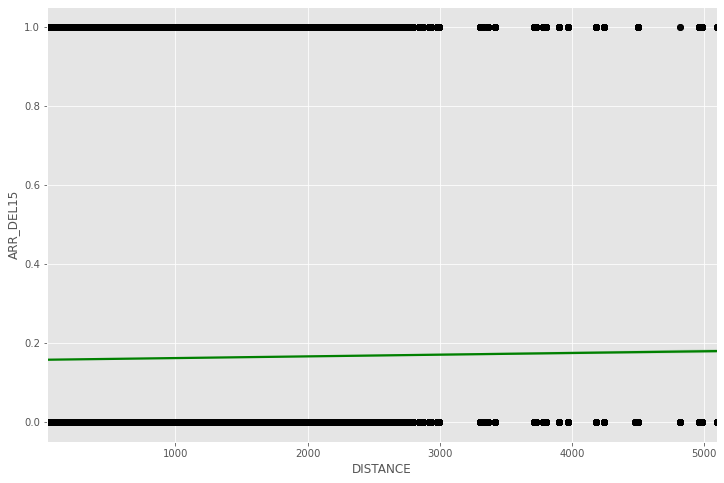

In [148]:
#lets plot with seaborn to check the correlation

sns.regplot(x='DISTANCE', y='ARR_DEL15', data=flights_jan, scatter_kws={"color":"black"}, line_kws={"color":"green"})

correlation = flights_jan['DISTANCE'].corr(flights_jan['ARR_DEL15'])
print("Correlation Coefficient:", correlation)